In [8]:
import time
import pandas as pd

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.svm import SVC 
from sklearn import svm, datasets

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mm, RobustScaler as rs
from sklearn.preprocessing import MaxAbsScaler as ma, Normalizer as nz, QuantileTransformer as qt, PowerTransformer as pt
#add robust scaling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from playsound import playsound

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
import joblib

#from config import path, trial_group, train_file, test_file,dataset

#train = pd.read_csv( train_file )
#test = pd.read_csv( test_file )

# data0 Balluff
# data1 ADXL
# dataset = '0'
dataset = '1'


# folder path
path = '1'

# trial run
trial_group = '1'


#Raw data
input_file = 'data'+str(dataset)+'/1.csv'


#Features Extracted to file
features_file = 'data'+str(dataset)+'/'+str(path)+'/'+str(trial_group)+'_features.csv'

#Train Test spilt
train_file = 'data'+str(dataset)+'/'+str(path)+'/train_'+str(trial_group)+'.csv'
test_file = 'data'+str(dataset)+'/'+str(path)+'/test_'+str(trial_group)+'.csv'

#number of train data
validation_split_i = 400

# the bigger, the more features selected
# default is 0.05
fdr_level = 0.05



train = pd.read_csv( train_file )
test = pd.read_csv( test_file )


x_train = train.drop( 'y', axis = 1 ).values
y_train = train.y.values

x_test = test.drop( 'y', axis = 1 ).values
y_test = test.y.values

x_train_ss = ss().fit_transform(x_train)
x_train_mm = mm().fit_transform(x_train)
x_train_rs = rs().fit_transform(x_train)
x_train_ma = ma().fit_transform(x_train)
x_train_nz = nz().fit_transform(x_train)
x_train_qt = qt().fit_transform(x_train)
x_train_pt = pt().fit_transform(x_train)

x_test_ss = ss().fit_transform(x_test)
x_test_mm = mm().fit_transform(x_test)
x_test_rs = rs().fit_transform(x_test)
x_test_ma = ma().fit_transform(x_test)
x_test_nz = nz().fit_transform(x_test)
x_test_qt = qt().fit_transform(x_test)
x_test_pt = pt().fit_transform(x_test)

no_sc_flag = True
ss_flag = True
mm_flag = True
rs_flag = False
ma_flag = False
nz_flag = False
qt_flag = False
pt_flag = False

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [9]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear']
            
            
        }  
    },

          
}

SVC(gamma='auto')

Gridsearch total time: 9.892738342285156s
Test Accuracy: 0.845
{'1': {'precision': 0.7, 'recall': 1.0, 'f1-score': 0.8235294117647058, 'support': 7}, '2': {'precision': 0.9375, 'recall': 0.7142857142857143, 'f1-score': 0.8108108108108109, 'support': 21}, '3': {'precision': 0.8571428571428571, 'recall': 0.96, 'f1-score': 0.9056603773584904, 'support': 25}, '4': {'precision': 0.7391304347826086, 'recall': 0.8095238095238095, 'f1-score': 0.7727272727272727, 'support': 21}, '5': {'precision': 0.95, 'recall': 0.8260869565217391, 'f1-score': 0.8837209302325583, 'support': 23}, 'accuracy': 0.845360824742268, 'macro avg': {'precision': 0.8367546583850931, 'recall': 0.8619792960662526, 'f1-score': 0.8392897605787676, 'support': 97}, 'weighted avg': {'precision': 0.8596681500928474, 'recall': 0.845360824742268, 'f1-score': 0.845217489339833, 'support': 97}}
******************************************************


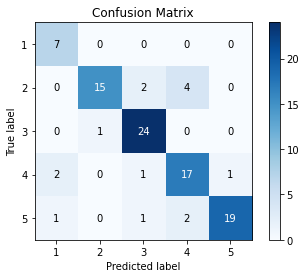

In [12]:
if no_sc_flag==True :
    
    # #Non Scaled X
    scores_no_sc = []
    
    for model_name, mp in model_params.items():
        
        start=time.time()
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True,refit=True)
        clf.fit(x_train, y_train)
        
        joblib.dump(clf.best_estimator_, 'data'+str(dataset)+'/'+str(path)+'/'+str(model_name)+'_'+str(trial_group)+'_no_sc.pkl')
        
        
        best_clf = clf.best_estimator_
    
        test_predict = best_clf.predict(x_test)
        
        print(mp['model'])
        print('')
        
        skplt.metrics.plot_confusion_matrix(y_test,test_predict) 
        ts_acc = round(accuracy_score(y_test,test_predict), 3)
        
        stop = time.time()
        gs_time = stop - start
        
        scores_no_sc.append({
            'model': model_name,
            'scaling' : 'Non scaled',
            'val_acc': clf.best_score_,
            'best_params': clf.best_params_,
            'total GS time' : gs_time,
            'time': clf.refit_time_,
            'test_acc': ts_acc
            })
        
    
        r=pd.DataFrame(clf.cv_results_)
        #r.to_csv('data'+str(dataset)+'/'+str(path)+'/'+str(model_name)+'_'+str(trial_group)+'_no_sc_results.csv',header = True, index = None)
        
        print(f"Gridsearch total time: {stop - start}s")
        print("Test Accuracy: "+str(ts_acc))
        print(classification_report(y_test,test_predict,output_dict=True))
        df_CAreport=classification_report(y_test,test_predict,output_dict=True)
        
        
        print("******************************************************")
        


In [20]:
#df_no_sc = pd.DataFrame(scores_no_sc,columns=['model','scaling','val_acc','best_params','total GS time','time','test_acc'])
df_ca_report_no_sc = pd.DataFrame(df_CAreport).transpose()
df_ca_report_no_sc

,precision,recall,f1-score,support
1,0.700000,1.000000,0.823529,7.000000
2,0.937500,0.714286,0.810811,21.000000
3,0.857143,0.960000,0.905660,25.000000
4,0.739130,0.809524,0.772727,21.000000
5,0.950000,0.826087,0.883721,23.000000
accuracy,0.845361,0.845361,0.845361,0.845361
macro avg,0.836755,0.861979,0.839290,97.000000
weighted avg,0.859668,0.845361,0.845217,97.000000
